In [1]:
# standard packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Physics 381:   Fractals and the Mandlebrot set

Starting with some initial configuration (state) of a physical system model we may want to determine the phase space trajectory corresponding to some set of governing equations.  This can often be represented as a set of coupled first order differential equations

  $$ \dot y(t) = f(y, t)  $$
  
Although there are closed form solutions for many interesting problems, there are infinitely more problems that can only be solved numerically.  For those cases we end up solving a *difference* equation

  $$ y(t_{i+1}) = f\left [ y(t_i), \,  y(t_{i-1}), \ldots \right ] $$

with solutions that are very nearly the same as the differential equations.

## Iterated functions

We can start with some intial state vector $x_0$ and apply some function $f(x)$ to it

  $$ x_1 = f(x_0) $$

then apply the same function to the new value $x_1$ 

  $$ x_2 = f(x_1) = f(\, f(x_0) \,) $$
  
so that after $N$ iterations we have 

  $$ x_N = f(x_{N-1}) = f( f( \ldots f(x_0) \ldots) ) = f^n(x_0)$$

Although it may be tempting to code this up using recursion, this is almost always a bad idea.

One interesting class of functions can be written in the form

  $$ z_{i+1} = a \, z^b + c $$
  
where the state vector is a single real ($x$) or complex ($z$) number.   

[(1.81+0j), (4.2761+0j), (19.285031209999996+0j), (372.9124287706739+0j)]

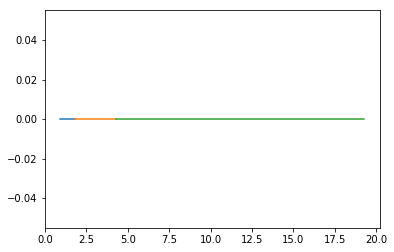

In [2]:
def plot_complex_trajectory(z, c, nsteps=49, text=False, arrow=False):

    """
    This is an example of Google style docstrings
    
    Calculate iterated function 
    
            $ z_{i+1} = z_i^2 + c $
            
    and plot in complex plane
    
    Args: 
        z: real or complex starting point
        c: real or complex offset
        nsteps: number of iterations
        text: plot text (default False)
        arrow: plot arrow (default False)
    
    Returns:
        A list of states
    """
    
    result = []
    for n in range(nsteps):
        
        z, z0 = z**2 + c, z
        if not np.isfinite(z): break    # quit if diverged to infinity
        if np.abs(z) > 1e3: break       # quit if becoming very large
        result.append(z)
    
        dz = z - z0
        if np.abs(dz) > 99: continue     # don't plot large steps

        plt.plot( [z0.real, z.real], [z0.imag,z.imag] )
               
        s = str(n) if text else ""  # labels
        if (n<5) and arrow:
#            plt.arrow(z0.real, z0.imag, dz.real, dz.imag, length_includes_head=True, head_width=0.03)
            plt.annotate(s, xy=(z.real,z.imag), xytext=(z0.real,z0.imag), 
                         bbox=dict(facecolor='wheat', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.5),
                         arrowprops=dict(connectionstyle="arc3,rad="+str((-1.0)**n) ))
    
    return result

z0 = 0.90 + 0j
plot_complex_trajectory(z0, 1.0, nsteps=49, text=False, arrow=False)

In [3]:
help(plot_complex_trajectory)

Help on function plot_complex_trajectory in module __main__:

plot_complex_trajectory(z, c, nsteps=49, text=False, arrow=False)
    This is an example of Google style docstrings
    
    Calculate iterated function 
    
            $ z_{i+1} = z_i^2 + c $
            
    and plot in complex plane
    
    Args: 
        z: real or complex starting point
        c: real or complex offset
        nsteps: number of iterations
        text: plot text (default False)
        arrow: plot arrow (default False)
    
    Returns:
        A list of states



##  b=1, c=0

A very simple recurrence relation

  $$ x_{i+1} = a \times x_{i} $$
  
contains both radioactive decay ($a \lt 1$) and compound interest ($a \gt 1$).  

## a=1, b=2, c=0

Start with a real number and square it repeatedly

  $$  x_1 = x_0^2 $$
  $$  x_2 = x_1^2 = x_0^4 $$
  $$  x_3 = x_2^2 = x_1^4 = x_0^6 $$  
  
There are three possible outcomes:  
  
 \#1) The result for $x_0=1$ after $n$ iterations is $x_n=1.0$.  This is known as a "fixed point".

 \#2) If $|x_0|<1$ then $x_n \rightarrow 0$

 \#3) If $|x_0|>1$ then $x_n \rightarrow \infty$
  

For example, if we start with the real number $x_0=0.9$ then the next step will be to $x_1=0.81$ and then to $x_2=0.6561$.

The plot below shows a sequence of points with thick curved arrows indicating a jump from one point to the next.

(0.81+0j)
(0.6561000000000001+0j)
(0.43046721000000016+0j)
(0.18530201888518424+0j)
(0.03433683820292518+0j)


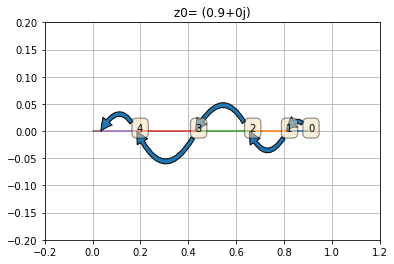

In [4]:
z0 = 0.90 + 0j
zvalues =  plot_complex_trajectory( z0, 0, arrow=True, text=True)
plt.xlim(-0.2, 1.2) ; plt.ylim(-0.2, 0.2)
plt.title( 'z0= '+ str(z0) )
plt.grid('on')
for z in zvalues[0:5]: print(z)

For a starting point $x_0=1.07$ the sequence takes increasingly larger steps along the positive real axis towards infinity.

(1.1449+0j)
(1.31079601+0j)
(1.7181861798319202+0j)
(2.9521637485654075+0j)
(8.71527079834376+0j)


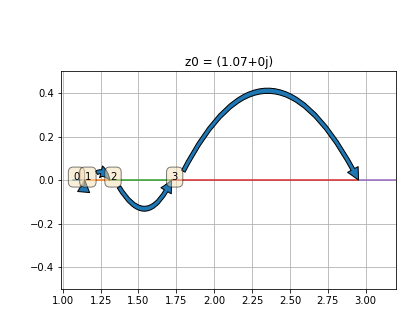

In [5]:
z0 = 1.07 + 0j
zvalues = plot_complex_trajectory( z0, 0, arrow=True, text=True) 
plt.xlim(0.99, 3.2) ; plt.ylim(-0.5, 0.5)
plt.title('z0 = '+str(z0))
plt.grid('on')
for z in zvalues[0:5]: print(z)

Note that if $x_0<0$ then the minus sign will be removed after the first iteration.  After that, things will proceed as for the positive values.

(0.81+0j)
(0.6561000000000001+0j)
(0.43046721000000016+0j)
(0.18530201888518424+0j)
(0.03433683820292518+0j)


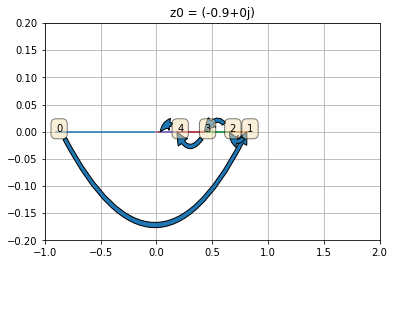

In [6]:
z0 = -0.90 + 0j
zvalues = plot_complex_trajectory( z0, 0, arrow=True, text=True) 
plt.xlim(-1.0, 2.0) ; plt.ylim(-0.2, 0.2)
plt.title('z0 = '+str(z0))
plt.grid('on')
for z in zvalues[0:5]: print(z)

For a complex number $z_0$ then each iteration will square the magnitude and double the phase

  $$ z_0 = x + i y = A e^{i \theta} $$
  
  $$ z_0^{n} = A^{n} e^{i n \theta} $$
  
There are three possible outcomes:

 \#1) If $A=1$ the sequence will remain on the unit circle while the phase clocks around increasingly quickly $z_n = e^{i 2 n \theta}$.
 
 \#2) If $A<1$ the sequence will eventually end up at $z_n=0$.
 
 \#3) If $A>1$ the sequence will eventually end up at $|z_n| =\infty$.
 

For a complex value with magnitude of almost $1.0$ the sequence will jump around to points on a slowly shrinking circle.  Eventually we will end up at the origin.

0.99996884 (0.80503116+0.5931799999999999j)
0.9999376809709455 (0.29621265617094567+0.9550567669775999j)
0.9998753658255525 (-0.8243914904738587+0.5657998034809415j)
0.9997507471847824 (0.35949191194663827-0.9328810866029394j)
0.9995015564965305 (-0.7410326869864314-0.6707264108834963j)


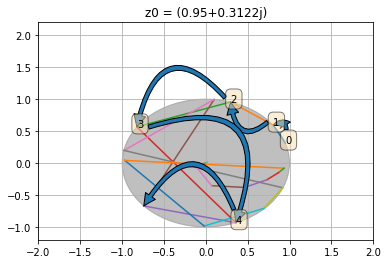

In [7]:
z0 =  0.95 + 0.3122j
zvalues = plot_complex_trajectory( z0, 0, arrow=True, text=True) 
plt.xlim(-2.0, 2.0) ; plt.ylim(-1.2, 2.2)
plt.title('z0 = '+str(z0))
plt.grid('on')
fig = plt.gcf()  ;  ax = fig.gca()
circle1 = plt.Circle((0, 0), 1.0, color='gray', alpha=0.5)
ax.add_artist(circle1)
for z in zvalues[0:5]: print( abs(z), z )

For a complex point with magnitude just slightly larger than $1.0$ we will get a sequence of points located on an expanding circle.  Eventually we will end up at infinity.

1.00003129 (0.8049687099999999+0.5933700000000001j)
1.000062580979064 (0.29588666717906387+0.9552885669054j)
1.000125165874507 (-0.8250273262458387+0.565314300511806j)
1.0002503474155102 (0.36108983068920514-0.9327994916795838j)
1.0005007575048486 (-0.739729025850531-0.673648821035115j)


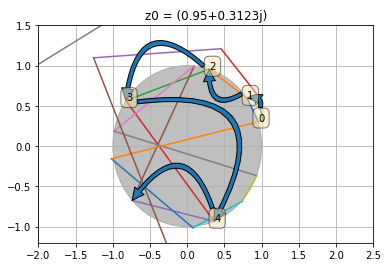

In [8]:
z0 =  0.95 + 0.3123j
zvalues = plot_complex_trajectory( z0, 0, arrow=True, text=True) 
plt.xlim(-2.0, 2.5) ; plt.ylim(-1.2, 1.5)
plt.title('z0 = '+str(z0))
plt.grid('on')
fig = plt.gcf()  ;  ax = fig.gca()
circle1 = plt.Circle((0, 0), 1.0, color='gray', alpha=0.5)
ax.add_artist(circle1)
for z in zvalues[0:5]: print( abs(z), z )

## Phase space separation

Consider a set of points spanning a very small amount of arc ($\theta = 0.0^\circ$ to $0.3^\circ$) just inside the unit circle.

After the first iteration they will all be slightly closer to the origin but their angular separation will also be slightly larger.  Each successive iteration will increase the angular separation while decreasing the radius.  For a while, this will increase the distance between neighboring points (diverging flow), but eventually they will all end up spiraling into the origin.

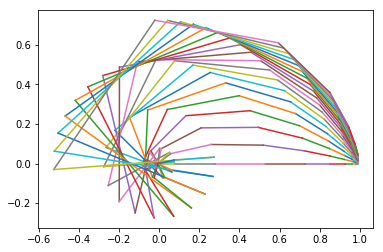

In [9]:
r=0.99
theta=np.linspace(0.0, 0.05, 19) 
z0 = r*np.exp(theta*1j)
for z in z0:
    plot_complex_trajectory( z, 0, nsteps=9)

A similar set of points just outside the unit circle will exhibit similar increases in angular separation, but will also move further apart as each point goes to infinity.

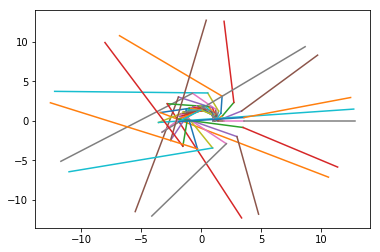

In [10]:
r = 1.01
theta=np.linspace(0.0, 0.05, 19) 
z0 = r*np.exp(theta*1j)
for z in z0:
    plot_complex_trajectory( z, 0, nsteps=9)

## a=1, b=2

Starting with a complex number at the origin $z_0 = 0$, we will iterate by squaring and adding another complex number $c$.

  $$  z_{i+1} = z_i^2 + c $$

We might be able to guess the outcome for very small or very large values of $c$, but some features of the resulting behavior are surprisingly complex.

(-1.1+0j) (0.1100000000000001+0j) ... (-1.0916079783099617+0j) (0.0916079783099617+0j) (-1.0916079783099617+0j)


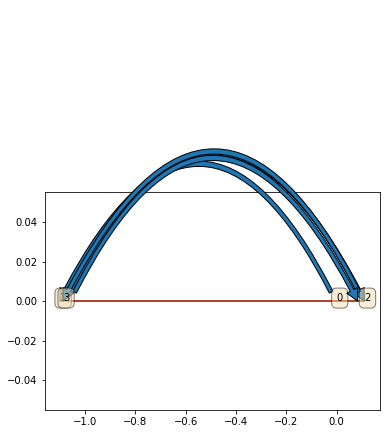

In [11]:
z = 0.0 + 0.0j
c = -1.1
stack = []
for i in range(99):
    z = z*z + c
    stack.append(z)
    
print( stack[0], stack[1], '...', stack[-3], stack[-2], stack[-1])
zvalues = plot_complex_trajectory( 0.0, -1.1, arrow=True, text=True, nsteps=4 )

For values of $z_0=0+0j$ and $c=-1.1+0j$ we find that the system seems to end up oscillating between two states: $x_a\approx 0.0916$ and $x_b\approx -1.0916$

-1.1
0.1100000000000001
-1.0879
0.08352641000000016
-1.093023338832512
0.09470001923257199
-1.0910319063573506
...
0.0916207904584696
-1.0916056307557653
0.09160285309769223
-1.0916089173043626
0.0916100283384027
-1.0916076027078372
0.09160715828955124


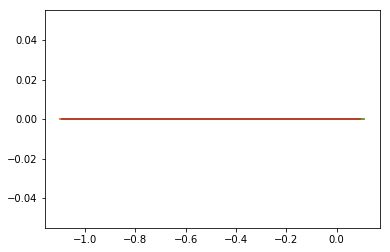

In [12]:
zvalues = plot_complex_trajectory( 0.0, -1.1, arrow=False, text=False, nsteps=24 )
for z in zvalues[0:7]: print(z)
print('...')
for z in zvalues[-7:]: print(z)

(-1.148664569111808+0j)
(0.01943029233281557+0j)
(-1.2996224637398615+0j)
(0.38901854825726745+0j)
(-1.148664569111808+0j)


[-1.3, 0.3900000000000001, -1.1479, 0.017674409999999696, -1.299687615231152]

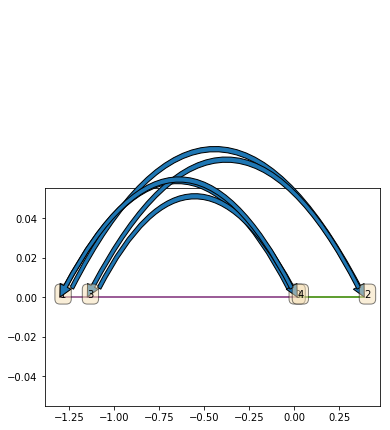

In [13]:
z = 0.0 + 0.0j
c = -1.3
stack = []
for i in range(99):
    z = z*z + c
    stack.append(z)
    
for indx in [-5,-4,-3,-2,-1]: print(stack[indx])
plot_complex_trajectory( 0.0, -1.3, arrow=True, text=True, nsteps=5 )

Another choice for $c$ ends up in an apparently stable "limit cycle" between 4 different states.

(-1.1408009150767606-0.016197893046580647j)
(0.0011643561008258807+0.0869571424197094j)
(-1.3075601888926722+0.05020249815857355j)
(0.40719335675567914-0.08128557595021692j)
(-1.1408009150716008-0.01619789305397505j)
(0.0011643560888137117+0.08695714243641334j)
(-1.3075601888956052+0.05020249815652336j)
(0.40719335676355506-0.08128557594514992j)
(-1.140800915064363-0.016197893051128953j)


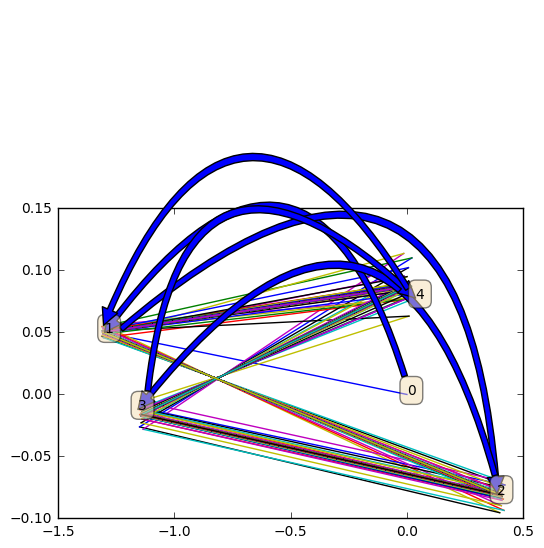

In [4]:
z0 = 0.0 + 0.0j
c0 = -1.3 + 0.05j

zvalues = plot_complex_trajectory( z0, c0, arrow=True, text=True, nsteps=595 )
for z in zvalues[-9:]: print(z)

Simply plotting the results for a range of $c$ values shows a tangle of paths around the origin.

(-5, 5)

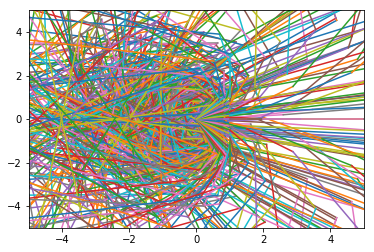

In [13]:
for x in np.linspace(-2.0, 1.0, 19):
    for y in np.linspace(-2.0, 1.0, 19):
        plot_complex_trajectory( 0.0, x+y*1j, nsteps=9)
plt.xlim(-5,5) ; plt.ylim(-5,5)

## numpy Mandlebrot

Tracing out trajectories one at a time is relatively slow.  It is much faster to set up 2D grids of complex numbers and apply computationally efficient vectorized functions.

Running through 99 interations for 40,000 points takes much less time than our previous "loopy" approach.
We can take the resulting grid, identify which points have not yet diverged to infinity, and show them as an image.

The resulting pattern is highly structured.

The Mandelbrot set is the set of complex numbers $c$ for which the function $f_c(z)=z^{2}+c$ does not diverge when iterated from $z=0$.

C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


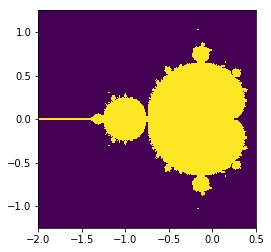

In [14]:
nx, ny = 201, 199
x = np.linspace(-2.0, 0.5, nx)
y = np.linspace(-1.25, 1.25, ny) 
xx,yy = np.meshgrid( x, y )
cgrid = xx + 1j * yy
z = 0.0 + 0.0j
for i in range(99): z = z*z + cgrid
#plt.imshow( np.abs(z), extent=[min(x), max(x), min(y), max(y)] )
plt.imshow( np.abs(z)<2.0, extent=[min(x), max(x), min(y), max(y)] )

In [15]:
def mandlebrot_set_value(cgrid, nloops = 99):
    """ docstring """
    nx, ny = cgrid.shape
    z = np.zeros( [nx,ny], dtype=np.complex )
    
    for i in range(nloops):
        z = z**2 + cgrid
        
    return z


def mandlebrot_count(cgrid, z0=0+0j, maxloops=999):
    """ docstring """
    z = z0*z0 + cgrid
    count = np.zeros(z.shape, dtype=np.int16)
    
    for nloops in range(maxloops):

        working = np.abs(z) < 2.0          
        if np.sum(working)==0:
            print('all points have diverged, exiting')
            break
            
        count[working] = nloops
        #z[working] = (z**2 + cgrid)[working]
        z[working] = z[working]**2 + cgrid[working]  # this might be faster (fewer calculations)

    return count

If we zoom into a smaller region then we can see fine details that look a lot like the large scale structure.

And zooming in even more seems to find self-similarity on even smaller scales.

C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in square
  import sys
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


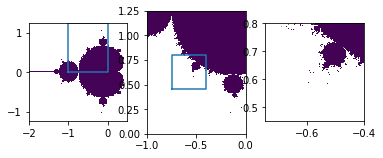

In [18]:
fig, axes = plt.subplots(1,3)

nx, ny = 201, 199
x = np.linspace(-2.0, 0.5, nx)
y = np.linspace(-1.25, 1.25, ny) 
xx,yy = np.meshgrid( x, y )
cgrid = xx + 1j * yy

vgrid = mandlebrot_set_value(cgrid)

corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
axes[0].imshow( np.log( np.abs(vgrid) ) , extent=corners)
corners0 = corners

nx, ny = 201, 199
x = np.linspace(-1.0, 0.0, nx)
y = np.linspace(0.0, 1.25, ny) 
xx,yy = np.meshgrid( x, y )
cgrid = xx + 1j * yy

vgrid = mandlebrot_set_value(cgrid)

corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
axes[1].imshow( np.log( np.abs(vgrid) ) , extent=corners)
corners1 = corners

nx, ny = 201, 199
x = np.linspace(-0.75, -0.4, nx)
y = np.linspace(0.45, 0.8, ny) 
xx,yy = np.meshgrid( x, y )
cgrid = xx + 1j * yy

vgrid = mandlebrot_set_value(cgrid)

corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
axes[2].imshow( np.log( np.abs(vgrid) ) , extent=corners)
corners2 = corners

# Square boxes on the plots
axes[0].plot( [corners1[0],corners1[1],corners1[1],corners1[0],corners1[0]], [corners1[2],corners1[2],corners1[3],corners1[3],corners1[2]])
axes[1].plot( [corners2[0],corners2[1],corners2[1],corners2[0],corners2[0]], [corners2[2],corners2[2],corners2[3],corners2[3],corners2[2]])

## Pause for thought
and
## Step away from the keyboard

If we find ourselves cutting and pasting the same code more than once or twice, then it is time to think about bundling it up into one or more functions.

Note change from value to count.  Plots of the Mandelbrot set often assign a color to each point based on how many iterations are required before it diverges (ie. $|z_\infty|>2$).

In [32]:
def mandlebrot_set_count(cgrid, maxloops = 999):
    """ docstring goes here """
    nx, ny = cgrid.shape
    z = np.zeros( [nx,ny], dtype=np.complex )
    nloops = np.zeros( [nx,ny], dtype=np.int16 )
    
    for i in range(maxloops):
        z = z**2 + cgrid
        nloops[ np.abs(z) < 2 ] = i
        
    return nloops


def show_mandlebrot_set(nx=300, ny=300, xlim=[-2.0,0.5], ylim=[-1.25,1.25], maxloops=999, plot=False):
    """ docstring goes here """
    x = np.linspace( xlim[0], xlim[1], nx )
    y = np.linspace( ylim[0], ylim[1], ny )
    xx, yy = np.meshgrid( x, y )
    c = xx + yy*1j
    countgrid = mandlebrot_set_count(c, maxloops)

    if plot:
        corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
        plt.figure( figsize=(6,6) )
        plt.imshow( countgrid, extent=corners)
        plt.set_cmap('prism')
        
    return countgrid

C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in square
  
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in absolute
  if __name__ == '__main__':
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


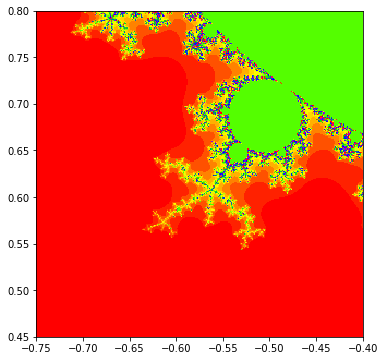

In [33]:
# zoom in on one of the "bulbs"
#
img = show_mandlebrot_set(300, 300, xlim=[-0.75, -0.4], ylim=[0.45, 0.8], plot=True)

/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in absolute


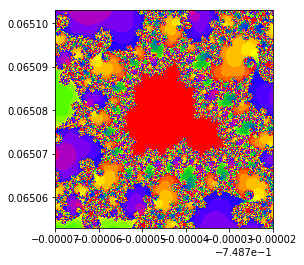

In [22]:
# zoom in a lot more
#
#-0.74877 <= x <= -0.74872
# 0.065053 <= y <= 0.065103

nx, ny = 900,900
xx, yy = np.meshgrid( np.linspace(-0.74877, -0.74872, nx), np.linspace(0.065053, 0.065103, ny) )
cgrid = xx + 1j * yy
test = mandlebrot_set_count(cgrid)

corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
plt.imshow( -test , extent=corners)

### Question \#1

After 100 iterations of the Mandlebrot set (starting at $z_0=0$), search for periodic points in the region defined below. In other words, how many points have a limit cycle of $n$ where $n=1,2,3 \ldots 100$?   Summarize and discuss your results results. 

For example: are stable points a significant fraction of the non-diverging (ie. $|z_\infty|<2$) points in this region?

<pre>
nx, ny = 299,301
xlim=[-0.75, -0.4] ;  ylim=[0.45, 0.8]
x = np.linspace( xlim[0], xlim[1], nx )
y = np.linspace( ylim[0], ylim[1], ny )
xx, yy = np.meshgrid( x, y )
c = xx + yy*1j 
z = 0.0 + 0.0j
</pre>

### Question \#2

Create an interesting image of some portion of the Mandlebrot, Julia, or other fractal iterated function system.  Save the result as a JPEG file and submit it with your Jupyter notebook.

# Extra notes

### Fractals and fractional dimension

https://en.wikipedia.org/wiki/Coastline_paradox

In [24]:
# you can also tweak exponent ie. 2.01 for slightly different shape
# See: https://en.wikipedia.org/wiki/Julia_set#Examples_of_Julia_sets

#https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en

## Julia sets
https://en.wikipedia.org/wiki/Julia_set

/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in add
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in multiply
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less


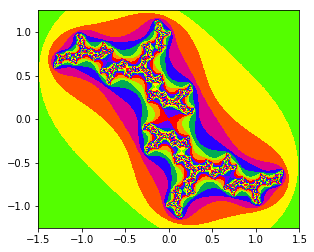

In [19]:
def julia_set_count(zgrid, cvalue, maxloops = 999):
    
    nx, ny = zgrid.shape
    z = zgrid.copy()
    nloops = np.zeros( [nx,ny], dtype=np.int16 )
    
    for i in range(maxloops):
        nloops[ (z.real**2 + z.imag**2) < 4 ] = i
        #z *= z
        #z += cvalue
        z.__imul__(z).__iadd__(cvalue)
        
    return nloops

nx, ny = 1000, 1000
xx, yy = np.meshgrid( np.linspace(-1.5, 1.5, nx), np.linspace(-1.25, 1.25, ny) )
zgrid = xx + 1j * yy
cvalue = 0.286+0j
cvalue = -0.05 -0.934j
test = julia_set_count(zgrid, cvalue, maxloops=80)
corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
plt.imshow( -test , extent=corners)

In [23]:
# think about why in-place operations might be important eg. "z.__imul__(z).__iadd__(cgrid)" 

## Periodic and fixed points

http://math.bu.edu/DYSYS/FRACGEOM/node3.html

https://plus.maths.org/content/unveiling-mandelbrot-set